<a href="https://colab.research.google.com/github/dvoils/neural-network-experiments/blob/main/sho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Simple Harmonic Oscillator (SHO)

A **Simple Harmonic Oscillator (SHO)** is one of the most fundamental models in classical mechanics. It describes systems in which the restoring force is directly proportional to the displacement from equilibrium and acts in the opposite direction. Common physical examples include a mass attached to a spring and small-angle pendulum oscillations.

## Newtonian Formulation

According to Newton’s second law, the net force acting on a mass is equal to the product of its mass and acceleration. For a spring obeying Hooke’s law, the restoring force is given by $F = -kx$, where $k$ is the spring constant and $x$ is the displacement from equilibrium. Applying Newton’s law:

$$
m \ddot{x} = -kx
$$

This leads to the second-order linear differential equation governing the motion of the SHO:

$$
m \ddot{x} + kx = 0
$$

This is a homogeneous linear differential equation with constant coefficients.

## Solution via Characteristic Equation

To solve this ODE, we assume a trial solution of the form:

$$
x(t) = e^{\lambda t}
$$

Substituting into the differential equation gives the characteristic equation:

$$
m \lambda^2 + k = 0
$$

Solving for $\lambda$, we obtain:

$$
\lambda = \pm i \sqrt{\frac{k}{m}} = \pm i \omega_0
$$

where we define the **natural angular frequency**:

$$
\omega_0 = \sqrt{\frac{k}{m}}
$$

Thus, the general solution to the SHO is:

$$
x(t) = A \cos(\omega_0 t) + B \sin(\omega_0 t)
$$

where $A$ and $B$ are constants determined by the initial conditions. Alternatively, it may be written in amplitude-phase form:

$$
x(t) = C \cos(\omega_0 t + \phi)
$$

where $C$ is the amplitude and $\phi$ is the phase.

## Phase Space Representation

The **phase space** of the SHO consists of the variables $x$ (position) and $\dot{x}$ (velocity). A plot of $\dot{x}(t)$ vs. $x(t)$ yields an ellipse, since the SHO undergoes uniform motion in phase space:

$$
x(t) = C \cos(\omega_0 t), \quad \dot{x}(t) = -C \omega_0 \sin(\omega_0 t)
$$

Eliminating time:

$$
\left( \frac{x}{C} \right)^2 + \left( \frac{\dot{x}}{C \omega_0} \right)^2 = 1
$$

This closed curve reflects the energy-conserving nature of the oscillator.

## Energy Conservation in SHO

The total mechanical energy of the SHO is the sum of kinetic and potential energy. The **kinetic energy** is:

$$
T = \frac{1}{2} m \dot{x}^2
$$

The **potential energy** stored in the spring is:

$$
U = \frac{1}{2} k x^2
$$

Thus, the total energy $E$ is:

$$
E = T + U = \frac{1}{2} m \dot{x}^2 + \frac{1}{2} k x^2
$$

Substituting the solutions $x(t)$ and $\dot{x}(t)$, we find that $E$ is constant in time. This reflects the conservative nature of the SHO system, with energy oscillating between kinetic and potential forms.

## Natural Frequency and Period

The **natural frequency** $\omega_0$ is defined as:

$$
\omega_0 = \sqrt{\frac{k}{m}}
$$

This parameter characterizes how fast the oscillator cycles. The **period** $T$ — the time to complete one full oscillation — is related to $\omega_0$ by:

$$
T = \frac{2\pi}{\omega_0} = 2\pi \sqrt{\frac{m}{k}}
$$

Both $\omega_0$ and $T$ depend only on the physical parameters of the system (mass and spring constant), not on the amplitude of oscillation — a hallmark of simple harmonic motion.


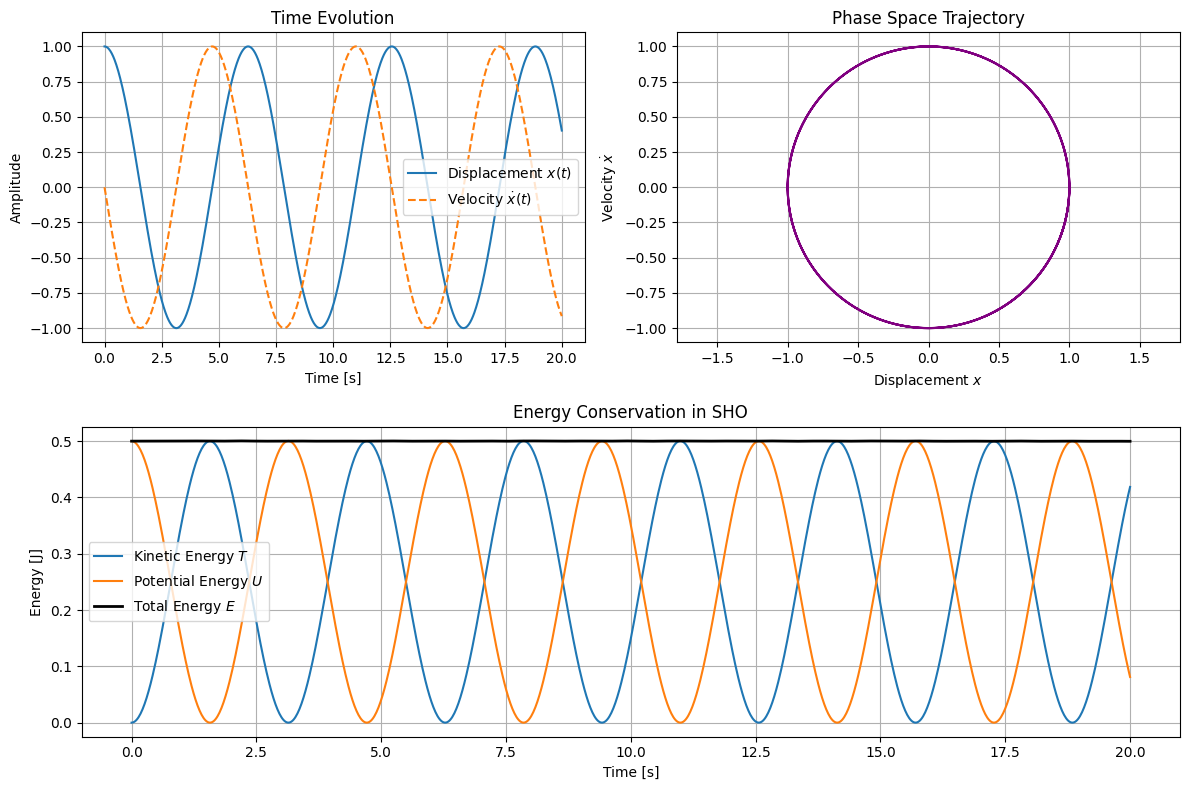

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
m = 1.0        # mass (kg)
k = 1.0        # spring constant (N/m)
omega0 = np.sqrt(k / m)

# Time span
t_start, t_end = 0, 20
t_eval = np.linspace(t_start, t_end, 1000)

# Initial conditions: x0 (displacement), v0 (velocity)
x0 = 1.0
v0 = 0.0

# Define the ODE system: dx/dt = v, dv/dt = -k/m * x
def sho(t, y):
    x, v = y
    dxdt = v
    dvdt = -k / m * x
    return [dxdt, dvdt]

# Solve the ODE
sol = solve_ivp(sho, [t_start, t_end], [x0, v0], t_eval=t_eval)

# Extract solutions
t = sol.t
x = sol.y[0]
v = sol.y[1]

# Energy computations
T = 0.5 * m * v**2
U = 0.5 * k * x**2
E_total = T + U

# Plotting
plt.figure(figsize=(12, 8))

# x(t) and v(t)
plt.subplot(2, 2, 1)
plt.plot(t, x, label='Displacement $x(t)$')
plt.plot(t, v, label='Velocity $\dot{x}(t)$', linestyle='--')
plt.title('Time Evolution')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# Phase space: v vs x
plt.subplot(2, 2, 2)
plt.plot(x, v, color='purple')
plt.title('Phase Space Trajectory')
plt.xlabel('Displacement $x$')
plt.ylabel('Velocity $\dot{x}$')
plt.grid(True)
plt.axis('equal')

# Energy over time
plt.subplot(2, 1, 2)
plt.plot(t, T, label='Kinetic Energy $T$')
plt.plot(t, U, label='Potential Energy $U$')
plt.plot(t, E_total, label='Total Energy $E$', linewidth=2, color='black')
plt.title('Energy Conservation in SHO')
plt.xlabel('Time [s]')
plt.ylabel('Energy [J]')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
